In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("../utils")

from utils import load_csv

# Cấu hình hiển thị
sns.set_theme(style="whitegrid")
%matplotlib inline

In [2]:
symbols = ["fpt", "hpg", "vnm"]
dfs = {}
for symbol in symbols:
    path = f"../../data/clean/{symbol}.csv"
    dfs[symbol] = load_csv(path)

2025-05-26 10:40:06,453 - INFO - ✅ Load CSV thành công: ../../data/clean/fpt.csv | shape = (4592, 6)


2025-05-26 10:40:06,471 - INFO - ✅ Load CSV thành công: ../../data/clean/hpg.csv | shape = (4363, 6)
2025-05-26 10:40:06,493 - INFO - ✅ Load CSV thành công: ../../data/clean/vnm.csv | shape = (4818, 6)


In [3]:
def explore_basic_info(df: pd.DataFrame, name: str):
    print(f"\n📊 Thông tin cơ bản - {name.upper()}")
    print(df.info())
    print("\n📈 Mô tả thống kê:")
    print(df.describe())

In [4]:
# Cell 4: Gọi khám phá dữ liệu cho từng mã
for symbol, df in dfs.items():
    explore_basic_info(df, symbol)



📊 Thông tin cơ bản - FPT
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4592 entries, 0 to 4591
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    4592 non-null   object 
 1   open    4592 non-null   float64
 2   high    4592 non-null   float64
 3   low     4592 non-null   float64
 4   close   4592 non-null   float64
 5   volume  4592 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 215.4+ KB
None

📈 Mô tả thống kê:
              open         high          low        close        volume
count  4592.000000  4592.000000  4592.000000  4592.000000  4.592000e+03
mean     26.752084    27.039220    26.481113    26.759164  1.444698e+06
std      33.508554    33.859121    33.170742    33.521360  1.930501e+06
min       2.040000     2.150000     2.040000     2.110000  1.820000e+03
25%       6.090000     6.140000     6.050000     6.087500  2.825050e+05
50%      11.270000    11.380000    11.155000    11.2

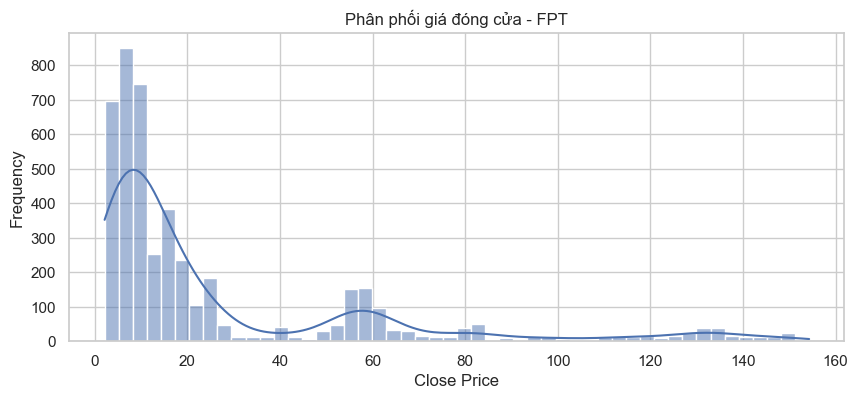

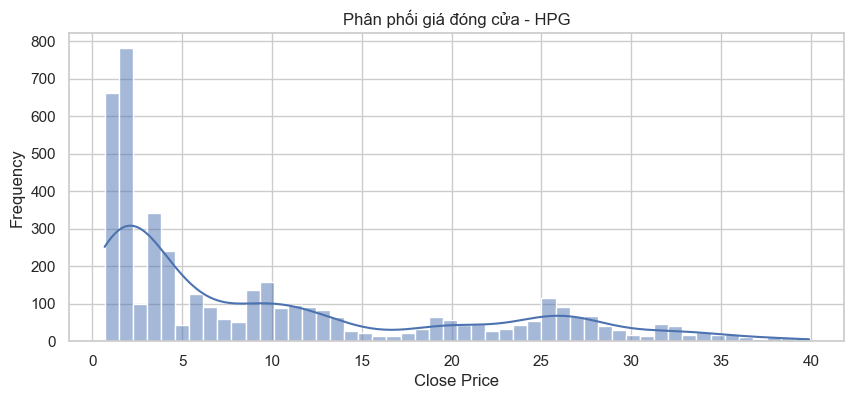

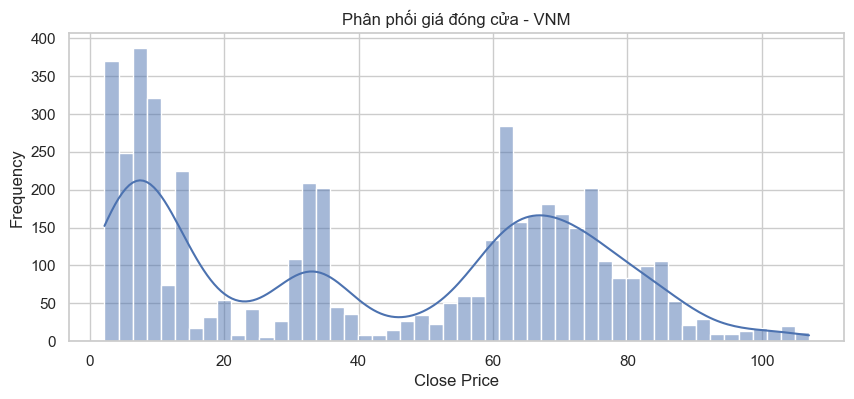

In [5]:
for symbol, df in dfs.items():
    plt.figure(figsize=(10, 4))
    sns.histplot(df["close"], kde=True, bins=50)
    plt.title(f"Phân phối giá đóng cửa - {symbol.upper()}")
    plt.xlabel("Close Price")
    plt.ylabel("Frequency")
    plt.show()


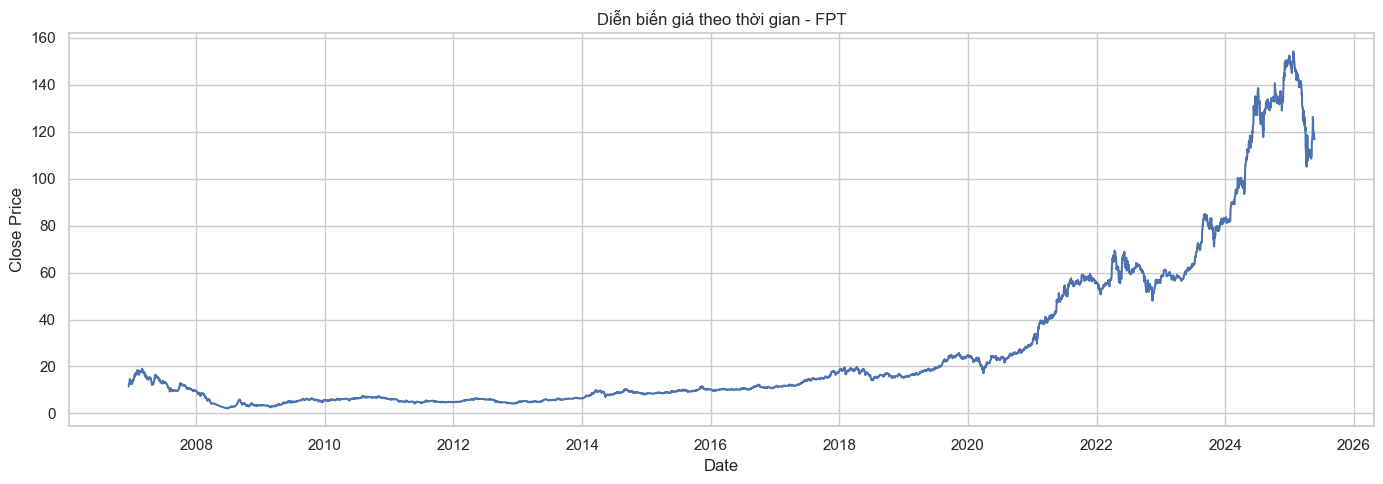

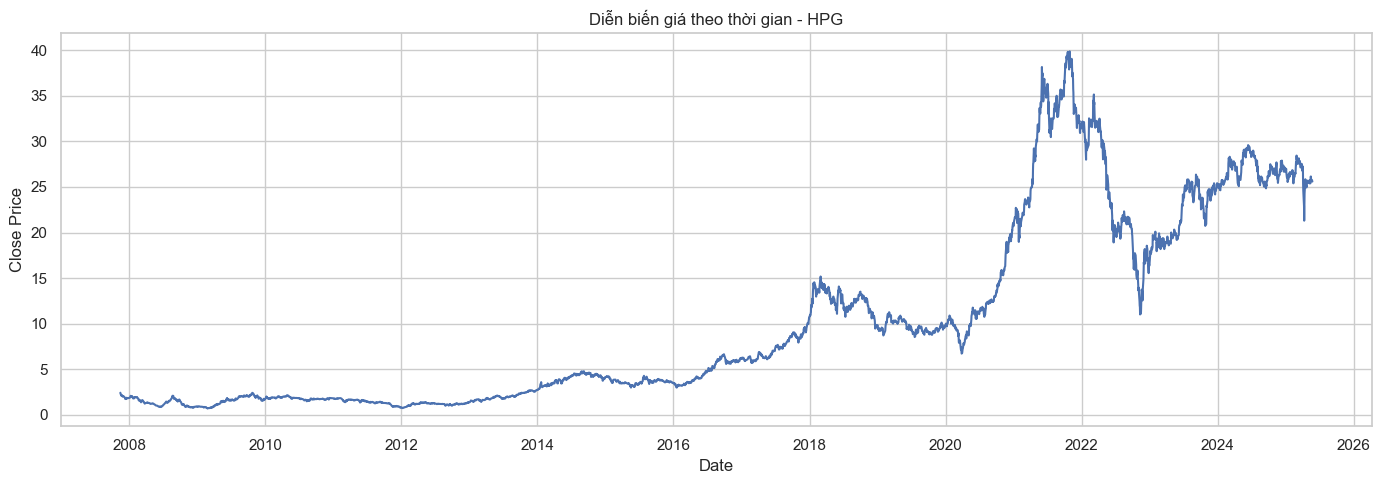

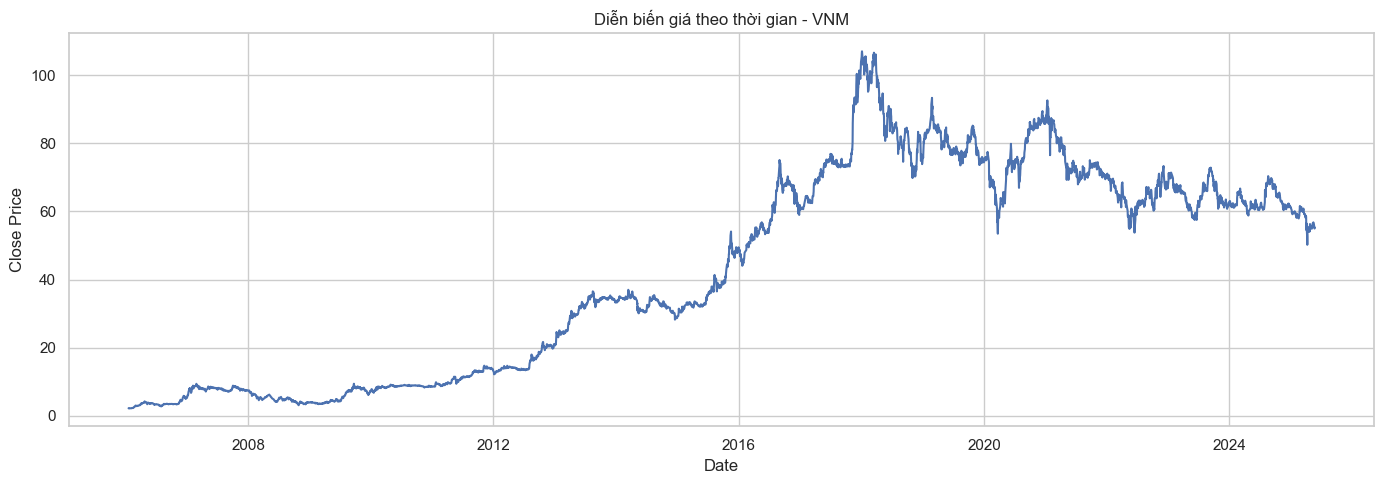

In [6]:
for symbol, df in dfs.items():
    plt.figure(figsize=(14, 5))
    plt.plot(pd.to_datetime(df["date"]), df["close"], label="Close")
    plt.title(f"Diễn biến giá theo thời gian - {symbol.upper()}")
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
